## Install Monocle3

In [ ]:
install.packages("synapser", repos=c("http://ran.synapse.org", "http://cran.fhcrc.org"))
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()
BiocManager::install(c("Biobase", "BiocGenerics","DelayedArray","DelayedMatrixStats","limma","S4Vectors","SingleCellExperiment","SummarizedExperiment"))
install.packages("devtools")
devtools::install_github('cole-trapnell-lab/monocle3')

In [2]:
### Load packages ###
library(monocle3) 
library(Matrix)
library(synapser)
synLogin('relyanow','thisismysynapsenaga1!') #### TODO: remove!

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with


Welcome, relyanow!

NULL

### Load Mathys single nucleus ROSMAP data from Synapse

In [3]:
# get data
p <- synapser::synGet('syn18686381')
counts <- readMM(p$path)

# Obtain a pointer and download the data
syn18642934 <- synGet(entity='syn18642934') 
# get batch metadata
batches <- read.csv(syn18642934$path,stringsAsFactors = F)

p2 <- synapser::synGet('syn18686372')
# get metadata
Labels <- read.delim(p2$path,stringsAsFactors = F)

p3 <- synapser::synGet('syn18686382')
rownames(counts) <- readLines(p3$path)   

colnames(counts) <- Labels[,1]
rownames(Labels) <- Labels[,1]

# get id mappings
p3 <- synapser::synGet('syn18694015')
ids <- read.csv(p3$path,stringsAsFactors = F)

metadata <- read.csv('ROSMAP_metadata2.csv')
p4 <- synGet(entity='syn3191087') 
metadata2 <- read.csv(p4$path)

sex = c()
m = as.character(metadata$msex)
fileName = c()
batch = c()
ros_ids = c()
projid = c()
Diagnosis = c()
cogdx = c()
ceradsc = c()
braaksc = c()
tangles = c()
apoe_genotype = c()
pmi = c()
educ=c()
race=c()
AOD=c()
# map metadata to cells
for(i in 1:length(rownames(Labels))){
    ros_ids = c(ros_ids,ids$Subject[c(which(ids$projid==Labels$projid[i])[1])])
    fileName = c(fileName,ids$fastq[c(which(ids$projid==Labels$projid[i])[1])])
}
Labels$ros_ids = ros_ids
Labels$fileName = fileName
head(Labels)
for(i in 1:length(rownames(Labels))){
    batch = c(batch,batches$sequencingBatch[c(which(batches$fileName==Labels$fileName[i])[1])])
    Diagnosis = c(Diagnosis,metadata$pathology.group[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    cogdx = c(cogdx,metadata$cogdx[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    sex = c(sex,m[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    ceradsc = c(ceradsc,metadata$ceradsc[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    braaksc = c(braaksc,metadata$braaksc[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    tangles = c(tangles,metadata$tangles[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    apoe_genotype = c(apoe_genotype,metadata2$apoe_genotype[c(which(metadata2$projid==Labels$projid[i])[1])])
    pmi = c(pmi,metadata2$pmi[c(which(metadata2$projid==Labels$projid[i])[1])])
    educ = c(educ,metadata2$educ[c(which(metadata2$projid==Labels$projid[i])[1])])
    race = c(race,metadata2$race[c(which(metadata2$projid==Labels$projid[i])[1])])
    AOD = c(AOD,metadata2$age_first_ad_dx[c(which(metadata2$projid==Labels$projid[i])[1])])
}
Labels$batch = batch
Labels$Diagnosis = Diagnosis
Labels$cogdx = cogdx
Labels$sex = sex
Labels$ceradsc = ceradsc
Labels$braaksc = braaksc
Labels$tangles = tangles
Labels$apoe_genotype = apoe_genotype
Labels$pmi = pmi
Labels$educ=educ
Labels$race=race
Labels$AOD=AOD

Labels$Diagnosis[Labels$Diagnosis=='late-pathology'] <- "Late-pathology AD"
Labels$Diagnosis[Labels$Diagnosis=='no-pathology'] <- 'Control'
Labels$Diagnosis[Labels$Diagnosis=='early-pathology'] <- 'Early-pathology AD'
Labels$simpleDiagnosis = Labels$Diagnosis
Labels$simpleDiagnosis[Labels$simpleDiagnosis!='Control'] <- "AD"
Labels$Diagnosis[Labels$Diagnosis==1]='Early-pathology AD'
Labels$Diagnosis[Labels$Diagnosis==2]='Late-pathology AD'
Labels$Diagnosis[Labels$Diagnosis==3]='Control'
head(Labels)

,TAG,projid,tsne1,tsne2,pre.cluster,broad.cell.type,Subcluster,ros_ids,fileName
,<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
AAACGGGAGATCCCGC.1,AAACGGGAGATCCCGC.1,11409232,18.076541,43.89940,15,Ex,Ex8,ROS13,D17-8753_S1_L001_I1_001.fastq.gz
AAATGCCTCCAATGGT.1,AAATGCCTCCAATGGT.1,11409232,8.130535,20.68742,3,Ex,Ex0,ROS13,D17-8753_S1_L001_I1_001.fastq.gz
AACCATGTCAGTGCAT.1,AACCATGTCAGTGCAT.1,11409232,17.088242,47.27229,15,Ex,Ex8,ROS13,D17-8753_S1_L001_I1_001.fastq.gz
AACCATGTCTGTACGA.1,AACCATGTCTGTACGA.1,11409232,15.482062,23.71838,3,Ex,Ex0,ROS13,D17-8753_S1_L001_I1_001.fastq.gz
AACCGCGTCCGCATAA.1,AACCGCGTCCGCATAA.1,11409232,28.993102,16.22391,2,Ex,Ex0,ROS13,D17-8753_S1_L001_I1_001.fastq.gz
AACGTTGGTTCAGGCC.1,AACGTTGGTTCAGGCC.1,11409232,16.909351,24.84811,3,Ex,Ex0,ROS13,D17-8753_S1_L001_I1_001.fastq.gz


,TAG,projid,tsne1,tsne2,pre.cluster,broad.cell.type,Subcluster,ros_ids,fileName,batch,⋯,sex,ceradsc,braaksc,tangles,apoe_genotype,pmi,educ,race,AOD,simpleDiagnosis
,<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
AAACGGGAGATCCCGC.1,AAACGGGAGATCCCGC.1,11409232,18.076541,43.89940,15,Ex,Ex8,ROS13,D17-8753_S1_L001_I1_001.fastq.gz,1,⋯,male,4,3,1.109769,33,1.333333,22,1,1,AD
AAATGCCTCCAATGGT.1,AAATGCCTCCAATGGT.1,11409232,8.130535,20.68742,3,Ex,Ex0,ROS13,D17-8753_S1_L001_I1_001.fastq.gz,1,⋯,male,4,3,1.109769,33,1.333333,22,1,1,AD
AACCATGTCAGTGCAT.1,AACCATGTCAGTGCAT.1,11409232,17.088242,47.27229,15,Ex,Ex8,ROS13,D17-8753_S1_L001_I1_001.fastq.gz,1,⋯,male,4,3,1.109769,33,1.333333,22,1,1,AD
AACCATGTCTGTACGA.1,AACCATGTCTGTACGA.1,11409232,15.482062,23.71838,3,Ex,Ex0,ROS13,D17-8753_S1_L001_I1_001.fastq.gz,1,⋯,male,4,3,1.109769,33,1.333333,22,1,1,AD
AACCGCGTCCGCATAA.1,AACCGCGTCCGCATAA.1,11409232,28.993102,16.22391,2,Ex,Ex0,ROS13,D17-8753_S1_L001_I1_001.fastq.gz,1,⋯,male,4,3,1.109769,33,1.333333,22,1,1,AD
AACGTTGGTTCAGGCC.1,AACGTTGGTTCAGGCC.1,11409232,16.909351,24.84811,3,Ex,Ex0,ROS13,D17-8753_S1_L001_I1_001.fastq.gz,1,⋯,male,4,3,1.109769,33,1.333333,22,1,1,AD


## Preprocessing

In [5]:
inds = rowSums(counts)>=250
length(inds)
counts = counts[inds,] # only keep genes non-zero in at least 250 cells

[1] 17926

In [6]:
detach("package:synapser", unload=TRUE)
unloadNamespace("PythonEmbedInR") # must unload synapser because causes multiple definitions of S4Vectors

In [7]:
library(Matrix)
library(scater)
library(monocle3)

# create monocle object
gene_short_name <- data.frame(rownames(counts))
rownames(gene_short_name) <- rownames(counts)
gene_short_name$gene_short_name <- rownames(counts)
head(gene_short_name)
length(gene_short_name)

cds <- new_cell_data_set(counts,
                     cell_metadata = Labels,
                     gene_metadata = gene_short_name)

Loading required package: ggplot2

Attaching package: ‘scater’

The following object is masked from ‘package:S4Vectors’:

    rename

The following object is masked from ‘package:stats’:

    filter



,rownames.counts.,gene_short_name
,<fct>,<chr>
FO538757.2,FO538757.2,FO538757.2
NOC2L,NOC2L,NOC2L
KLHL17,KLHL17,KLHL17
HES4,HES4,HES4
ISG15,ISG15,ISG15
AGRN,AGRN,AGRN


[1] 2

In [96]:
### impute missing PMI values
paste('Imputing PMI to:',median(cds$pmi[!is.na(cds$pmi)]))
cds$pmi[is.na(cds$pmi)]=median(cds$pmi[!is.na(cds$pmi)])
cds$apoe_genotype[is.na(cds$apoe_genotype)] = '33'

[1] "Imputing PMI to: 7.58333333333333"

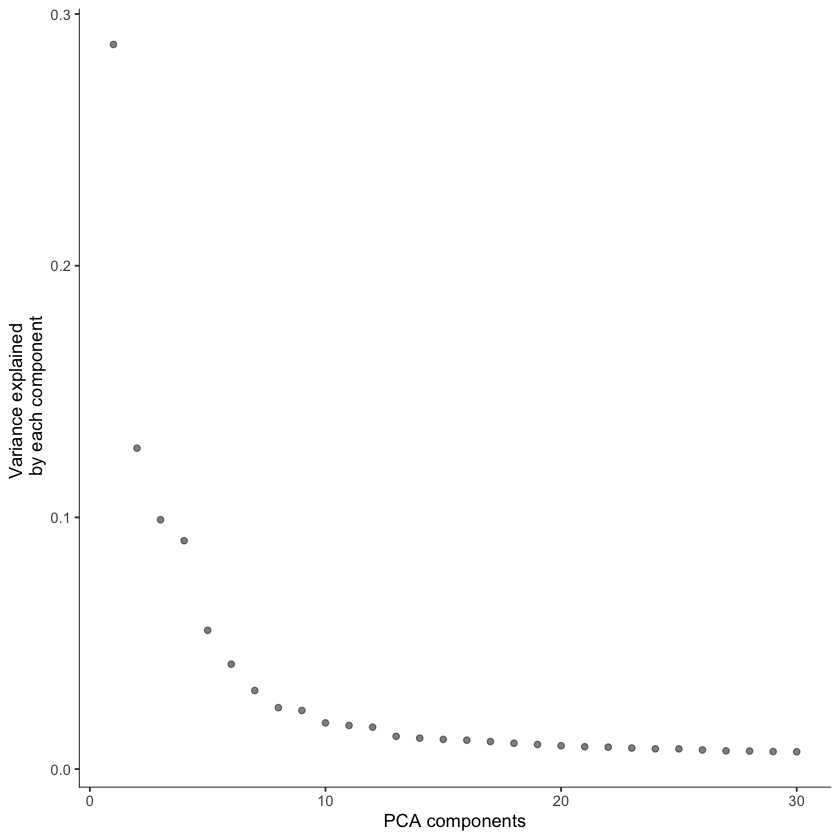

In [342]:
### preprocessing and reduce dimensionality
### preprocessing includes library size normalization and regressing out batch, eduction, and pmi
### note: data is not log-normalized
cds = preprocess_cds(cds, num_dim = 30,method="LSI",norm_method="size_only",residual_model_formula_str="~batch+educ+pmi")
cds = reduce_dimension(cds)
plot_pc_variance_explained(cds)

In [10]:
### save progress
saveRDS(cds, file = "Mathys_monocle_preprocessed_cds.rds")

In [1076]:
library(Matrix)
library(scater)
library(monocle3)
cds = readRDS(file = "Mathys_monocle_preprocessed_cds.rds")

In [1077]:
library(ggplot2)
library(gridExtra)
library(MASS)
library(limma)
library(edgeR)
library(grid)
cds$educ = as.numeric(cds$educ)
cds$Education = cds$educ
cds$Sex = cds$sex
cds$CERAD = cds$ceradsc
cds$Braak = cds$braaksc
cds$APOE_genotype = cds$apoe_genotype
cds$batch = as.character(cds$batch)
cds$Diagnosis[cds$Diagnosis=='Early-pathology AD']='Early-path AD'
cds$Diagnosis[cds$Diagnosis=='Late-pathology AD']='Late-path AD'

In [345]:

p1<-plot_cells(cds, color_cells_by="Education",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))
p2<-plot_cells(cds, color_cells_by="Sex",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))
p3<-plot_cells(cds, color_cells_by="Diagnosis",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 8))
p4<-plot_cells(cds, color_cells_by="ros_ids",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(legend.position = "none")
p6<-plot_cells(cds, color_cells_by="Subcluster",cell_size=.1,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 7),legend.key.size = unit(.5, "cm"),
  legend.key.width = unit(0.5,"cm") )
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_summary.pdf"))
grid.arrange(arrangeGrob(p1,p4, ncol=2),arrangeGrob(p3,p2,ncol=2),p6, heights=c(2,2,4), ncol=1)
dev.off()

pdf 
  2

## Plot trajectories for each cell type

In [134]:
for (celltype in unique(cds$broad.cell.type)){   
    if (length(cds$Subcluster[cds$broad.cell.type==celltype])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$broad.cell.type==celltype])<3000){
        cell_size=.5}
    else if (length(cds$Subcluster[cds$broad.cell.type==celltype])<5000){
        cell_size=.1}
    else if (length(cds$Subcluster[cds$broad.cell.type==celltype])<10000){
        cell_size=.02}
    else {
        cell_size=.01
    }
    cds_subset = cds[,cds$broad.cell.type==celltype] 
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 10,] # only keep genes non-zero in at least 10 cells
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)

    cds_subset <- learn_graph(cds_subset)

    p1<-plot_cells(cds_subset, color_cells_by="Sex",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    p2<-plot_cells(cds_subset, color_cells_by="APOE_genotype",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    p3<-plot_cells(cds_subset, color_cells_by="Braak",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    p4<-plot_cells(cds_subset, color_cells_by="CERAD",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    p5<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    p6<-plot_cells(cds_subset, color_cells_by="ros_ids",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(legend.position = "none")
    p7<-plot_cells(cds_subset, color_cells_by="Subcluster",cell_size=cell_size*3,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    #pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_",celltype,".pdf"))
    grid.arrange(arrangeGrob(p6,p1, ncol=2),arrangeGrob(p3,p4,ncol=2),arrangeGrob(p2,p5, ncol=2),p7, heights=c(2,2,2,4.3), ncol=1)
    #dev.off()
    }

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


### Plot trajectories for each subtype identified by Mathys and identify which vary across diagnosis/sex

In [135]:
for (subcluster in unique(cds$Subcluster)){   #unique(cds$Subcluster)
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
    cds_subset = cds[,cds$Subcluster==subcluster] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 10,] # only keep genes non-zero in at least 10 cells
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)

    cds_subset <- learn_graph(cds_subset,use_partition=T)

    p1<-plot_cells(cds_subset, color_cells_by="Sex",cell_size=cell_size*3,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p2<-plot_cells(cds_subset, color_cells_by="APOE_genotype",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p3<-plot_cells(cds_subset, color_cells_by="Braak",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p4<-plot_cells(cds_subset, color_cells_by="CERAD",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p6<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_",subcluster,".pdf"))
    grid.arrange(arrangeGrob(p6,p2, ncol=2),arrangeGrob(p3,p4,ncol=2),p1, heights=c(2,2,4), ncol=1)
    dev.off()
    }

Warning message in louvain_clustering(data, pd[row.names(data), ], k = k, weight = weight, :
“RANN counts the point itself, k must be smaller than
the total number of points - 1 (all other points) - 1 (itself)!”

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

Warning message in louvain_clustering(data, pd[row.names(data), ], k = k, weight = weight, :
“RANN counts the point itself, k must be smaller than
the total number of points - 1 (all other points) - 1 (itself)!”

  |======================================================================| 100%


Warning message in louvain_clustering(data, pd[row.names(data), ], k = k, weight = weight, :
“RANN counts the point itself, k must be smaller than
the total number of points - 1 (all other points) - 1 (itself)!”

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Warning message in louvain_clustering(data, pd[row.names(data), ], k = k, weight = weight, :
“RANN counts the point itself, k must be smaller than
the total number of points - 1 (all other points) - 1 (itself)!”

  |======================================================================| 100%


In [136]:
### Female ###
for (subcluster in unique(cds$Subcluster)){   #unique(cds$Subcluster)
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
    cds_subset = cds[,colData(cds)$sex=="female"] # mic3 subcluster
    cds_subset = cds_subset[,cds_subset$Subcluster==subcluster] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 10,] # only keep genes non-zero in at least 10 cells
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)

    cds_subset <- learn_graph(cds_subset)

    p1<-plot_cells(cds_subset, color_cells_by="ros_ids",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(legend.position = "none")
    p2<-plot_cells(cds_subset, color_cells_by="APOE_genotype",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p3<-plot_cells(cds_subset, color_cells_by="Braak",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p4<-plot_cells(cds_subset, color_cells_by="CERAD",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p5<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=cell_size*3,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_female_",subcluster,".pdf"))
    grid.arrange(arrangeGrob(p1,p2, ncol=2),arrangeGrob(p3,p4,ncol=2),p5, heights=c(2,2,4), ncol=1)
    dev.off()
    }

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Warning message in louvain_clustering(data, pd[row.names(data), ], k = k, weight = weight, :
“RANN counts the point itself, k must be smaller than
the total number of points - 1 (all other points) - 1 (itself)!”

In [143]:
### Male ###
for (subcluster in unique(cds$Subcluster)){   #
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
    cds_subset = cds[,colData(cds)$sex=="male"] # mic3 subcluster
    cds_subset = cds_subset[,cds_subset$Subcluster==subcluster] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 10,] # only keep genes non-zero in at least 10 cells
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)

    cds_subset <- learn_graph(cds_subset)
    inds = which(colData(cds_subset)$CERAD==4)
    cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[inds[1]])

    p1<-plot_cells(cds_subset, color_cells_by="ros_ids",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(legend.position = "none")
    p2<-plot_cells(cds_subset, color_cells_by="APOE_genotype",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p3<-plot_cells(cds_subset, color_cells_by="Braak",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p4<-plot_cells(cds_subset, color_cells_by="CERAD",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p5<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=cell_size*3,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_male_",subcluster,".pdf"))
    grid.arrange(arrangeGrob(p1,p2, ncol=2),arrangeGrob(p3,p4,ncol=2),p5, heights=c(2,2,4), ncol=1)
    dev.off()
    }

### plot sex differences of pseudotime

In [661]:
library(qvalue)
library(cluster)
library(Rfast)
plot_list<- list()

index=0
for (subcluster in sort(unique(cds$Subcluster))){#unique(cds$Subcluster)
    if (length(cds$Subcluster[cds$Subcluster==subcluster])>=500){
    index=index+1
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
        print(subcluster)
    cds_subset = cds[,cds$sex!='lkjmale']
    cds_subset = cds_subset[,cds_subset$broad.cell.type==gsub('[[:digit:]]+', '', subcluster)] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 20,] # only keep genes non-zero in at least 20 cells
    #cds_subset = preprocess_cds(cds_subset, num_dim = 30,method="LSI",norm_method="size_only")
    cds_subset = cds_subset[,cds_subset$Subcluster==subcluster] # mic3 subcluster
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)
    if (length(unique(cds_subset@clusters$UMAP$partitions))>1){
        m<-0
        p<-"1"
        for (partition in unique(cds_subset@clusters$UMAP$partitions)){
            if (length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])>m){
                        m<-length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])
                        p<-partition
            }
        }
        cds_subset = cds_subset[,cds_subset@clusters$UMAP$partitions==p]
        cds_subset = reduce_dimension(cds_subset)
        cds_subset = cluster_cells(cds_subset)
    }
        
    cds_subset = cds_subset[,clusters(cds_subset)!=14]
    cds_subset$s=cds_subset$pmi
    cds_subset$s[cds_subset$sex=='female']=1
    cds_subset$s[cds_subset$sex=='male']=0      
    pc1 = cds_subset@reducedDims$PCA[,1]#colmeans(t(cds_subset@reducedDims$UMAP-min(cds_subset@reducedDims$UMAP)))#as.matrix(dist(cds_subset@reducedDims$UMAP,method="euclidean"))
#     out <- t.test(as.vector(d[cds_subset$sex=='female']),as.vector(d[cds_subset$sex=='male']))
#     pval = out$p.value
       pval_data <- data.frame(
       batch = as.factor(colData(cds_subset)$batch),
       pmi = colData(cds_subset)$pmi,
       educ = colData(cds_subset)$educ,
       pc1 = pc1,
       sex = cds_subset$sex
    )
        dm <- model.matrix(~sex+educ, data=pval_data)
        fit1 <- lmFit(pval_data$pc1,dm)
        fit2 <- eBayes(fit1)
        pval=topTable(fit2,coef=2)$adj.P.Val 
    stars=''
    if (pval < .01){
        stars = '*'
    }
    if (pval < .001){
        stars = '**'
    }
    if (pval < .0001){
        stars = '***'
    }

    p1<-plot_cells(cds_subset, color_cells_by="Sex",cell_size=cell_size,label_cell_groups=FALSE)+
    theme(legend.position = "none")+
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        theme(axis.title.x=element_blank(),axis.title.y=element_blank())
    p3<-arrangeGrob(p1,ncol=1,top = textGrob(paste0(subcluster,', ',paste('p=',formatC(pval, format = "e", digits = 2)),stars),gp=gpar(fontsize=10,font=2)))
    plot_list[[index]]<-p3
    }}


[1] "Ast0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ast1"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex1"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex11"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex12"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex2"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex3"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex4"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex5"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex6"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex7"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex8"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex9"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In1"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In2"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In3"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In4"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In5"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In6"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In7"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Mic0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Mic1"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Oli0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Oli1"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Oli3"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Oli4"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Oli5"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Opc0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Opc1"


No trajectory to plot. Has learn_graph() been called yet?


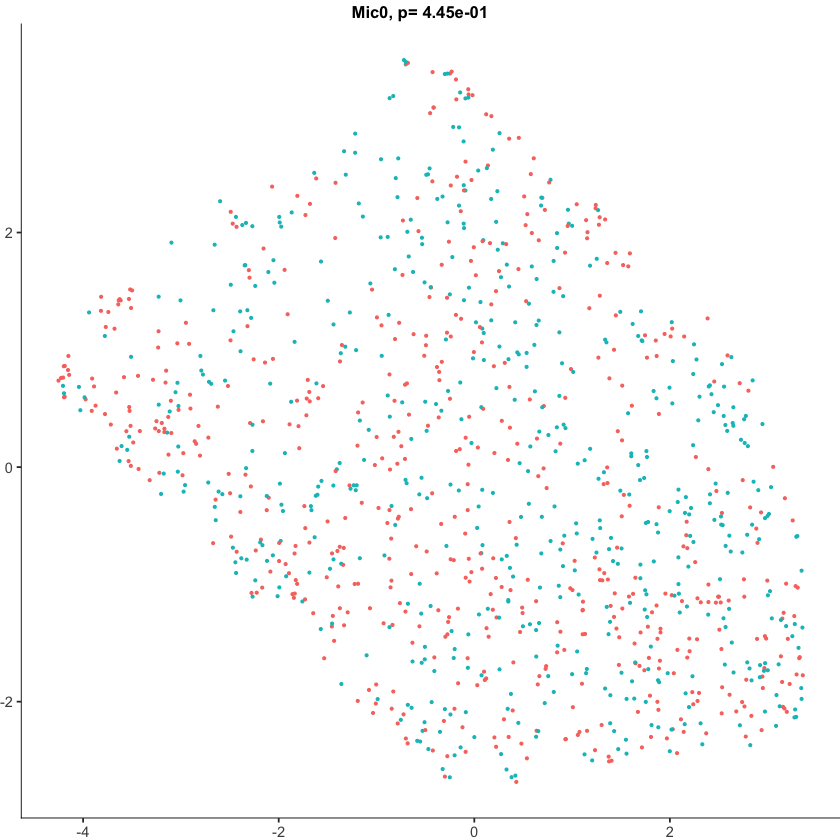

In [658]:
do.call(grid.arrange, c(plot_list, ncol=1))

In [662]:
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_sex",".pdf"))
do.call(grid.arrange, c(plot_list[1:30], ncol=5))
dev.off()

pdf 
  2

In [423]:
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_sex_part2",".pdf"))
do.call(grid.arrange, c(plot_list[16:30], ncol=3))
dev.off()

pdf 
  2

### plot diagnosis differences over pseudotime

In [715]:
library(qvalue)
plot_list<- list()

index=0
for (subcluster in sort(unique(cds$Subcluster))){#unique(cds$Subcluster)
    if (length(cds$Subcluster[cds$Subcluster==subcluster])>=500){
    index=index+1
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
        print(subcluster)
    cds_subset = cds[,cds$sex=='female']
    cds_subset = cds_subset[,cds_subset$broad.cell.type==gsub('[[:digit:]]+', '', subcluster)] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 20,] # only keep genes non-zero in at least 20 cells
    cds_subset = preprocess_cds(cds_subset, num_dim = 30,method="LSI",norm_method="size_only")
    cds_subset = cds_subset[,cds_subset$Subcluster==subcluster] # mic3 subcluster
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Control']='Cont'
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Late-path AD']='Late'
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Early-path AD']='Early'
    if (length(unique(cds_subset@clusters$UMAP$partitions))>1){
        m<-0
        p<-"1"
        for (partition in unique(cds_subset@clusters$UMAP$partitions)){
            if (length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])>m){
                        m<-length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])
                        p<-partition
            }
        }
        cds_subset = cds_subset[,cds_subset@clusters$UMAP$partitions==p]
        cds_subset = reduce_dimension(cds_subset)
        cds_subset = cluster_cells(cds_subset)
    }
        
    pval_data <- data.frame(
       batch = colData(cds_subset)$batch,
       pmi = colData(cds_subset)$pmi,
       educ = colData(cds_subset)$educ,
       Diagnosis = cds_subset$pmi,
       ros_ids = cds_subset$ros_ids
    )
    pval_data$Diagnosis[cds_subset$Diagnosis=='Cont']=0
    pval_data$Diagnosis[cds_subset$Diagnosis=='Early']=1
    pval_data$Diagnosis[cds_subset$Diagnosis=='Late']=2   
        
    cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions == "2"] <- "1"
    cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions == "3"] <- "1"
    cds_subset <- learn_graph(cds_subset)
    inds = which(cds_subset$Diagnosis=='Cont')
    inds = which(cds_subset$CERAD[inds]>3)
    inds <- sample(inds) # shuffle indices
         
    pvals = c()
    best_ind = 1
    best_ind2 = 1
    best_dif = -Inf
    i=0
    for (ind in inds[1:min(length(inds),50)]){
        i=i+1
        cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[ind])
        mc = median(pseudotime(cds_subset)[cds_subset$Diagnosis=='Cont'])
        ma = median(pseudotime(cds_subset)[cds_subset$Diagnosis!='Cont'])
        if (ma-mc > best_dif){
            best_dif = ma-mc
            best_ind = i
            best_ind2 = ind
        }
        if (mc > ma){
            pval = 1
        }
        else{
            cds_subset$pseudotime = pseudotime(cds_subset)
            pval_data$pseudotime = cds_subset$pseudotime
            pval_data$Diagnosis = as.numeric(pval_data$Diagnosis)
            dm <- model.matrix(~pseudotime+pmi+batch+educ, data=pval_data)
            fit1 <- lmFit(pval_data$Diagnosis,dm)
            fit2 <- eBayes(fit1)
            pval=topTable(fit2,coef=2)$adj.P.Val   
        }
        pvals <- c(pvals,pval)
    }
    pi0 = qvalue(pvals, fdr.level=0.05, pi0.method="bootstrap")$pi0
    pval = qvalue(pvals, fdr.level=0.05, pi0.method="bootstrap")$qvalues[best_ind]
    print(pi0)
    print(pval)
    cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[best_ind2]) # set root to best ind    
    cds_subset$pseudotime = pseudotime(cds_subset)
    pval_data$pseudotime = cds_subset$pseudotime
    stars=''
    if (pi0<.5){
        if (pval < .01){
            stars = '*'
        }
        if (pval < .001){
            stars = '**'
        }
        if (pval < .0001){
            stars = '***'
    }}
    pval_data$Diagnosis = as.factor(cds_subset$Diagnosis)
    dp <- ggplot(pval_data, aes(x=Diagnosis, y=pseudotime, fill=Diagnosis)) + 
      geom_violin(trim=FALSE)+geom_boxplot(width=0.1, fill="white")
    p1<-dp+theme(legend.position = "none")+theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        theme(axis.title=element_text(size=8))

    p2<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+
    theme(legend.position = "none")+
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        theme(axis.title.x=element_blank(),axis.title.y=element_blank())
    p3<-arrangeGrob(p1,p2,ncol=2,top = textGrob(paste0(subcluster,', ',paste('q=',formatC(pval, format = "e", digits = 2)),stars),gp=gpar(fontsize=10,font=2)))
    plot_list[[index]]<-p3
    }}



[1] "Ast0"
[1] 0.3777778
[1] 8.695295e-30
[1] "Ast1"
[1] 1
[1] 1
[1] "Ex0"
  |======================================================================| 100%
[1] 0.7529412
[1] 3.797896e-30
[1] "Ex1"
  |======================================================================| 100%
[1] 0.6823529
[1] 3.698305e-17
[1] "Ex11"
[1] 0.8842105
[1] 0.02314302
[1] "Ex12"
[1] 0.7764706
[1] 4.081244e-05
[1] "Ex2"
  |======================================================================| 100%
[1] 0.9882353
[1] 0.9882353
[1] "Ex3"
  |======================================================================| 100%
[1] 0.7157895
[1] 0.001009578
[1] "Ex4"
  |======================================================================| 100%
[1] 1
[1] 4.893818e-32
[1] "Ex5"
  |======================================================================| 100%
[1] 0.9176471
[1] 3.790955e-17
[1] "Ex6"
  |======================================================================| 100%
[1] 0.8470588
[1] 0.04426768
[1] "Ex7"
  |=======

In [716]:
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_diagnosis_part1",".pdf"))
do.call(grid.arrange, c(plot_list[1:15], ncol=3))
dev.off()

pdf 
  2

In [717]:
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_diagnosis_part2",".pdf"))
do.call(grid.arrange, c(plot_list[16:30], ncol=3))
dev.off()

pdf 
  2

### plot diagnostic criterial (CERAD, Braak, cogdx, apoe genotype) for subtypes which show variation in diagnosis across pseudotime

In [709]:
plot_list<- list()
cds$APOE_genotype[is.na(cds$APOE_genotype)]='33'
index=0
for (subcluster in c('Mic1','Oli0','Oli1')){#,'Oli0','Oli1'
    index=index+1
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
        print(subcluster)
    cds_subset = cds[,cds$sex=='male']
    cds_subset = cds_subset[,cds_subset$broad.cell.type==gsub('[[:digit:]]+', '', subcluster)] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 20,] # only keep genes non-zero in at least 20 cells
    cds_subset = preprocess_cds(cds_subset, num_dim = 30,method="LSI",norm_method="size_only")
    cds_subset = cds_subset[,cds_subset$Subcluster==subcluster] # mic3 subcluster
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Control']='Cont'
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Late-path AD']='Late'
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Early-path AD']='Early'
    if (length(unique(cds_subset@clusters$UMAP$partitions))>1){
        m<-0
        p<-"1"
        for (partition in unique(cds_subset@clusters$UMAP$partitions)){
            if (length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])>m){
                        m<-length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])
                        p<-partition
            }
        }
        cds_subset = cds_subset[,cds_subset@clusters$UMAP$partitions==p]
        cds_subset = reduce_dimension(cds_subset)
        cds_subset = cluster_cells(cds_subset)
    }
    cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions == "2"] <- "1"
    cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions == "3"] <- "1"
    cds_subset <- learn_graph(cds_subset)
    
    inds = which(cds_subset$Diagnosis=='Cont')
    inds = which(cds_subset$CERAD[inds]>3)
    best_ind = 1
    best_ind2 = 1
    best_dif = -Inf
    i=0
    for (ind in inds[1:min(length(inds),50)]){
        i=i+1
        cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[ind])
        mc = median(pseudotime(cds_subset)[cds_subset$Diagnosis=='Cont'])
        ma = median(pseudotime(cds_subset)[cds_subset$Diagnosis!='Cont'])
        if (ma-mc > best_dif){
            best_dif = ma-mc
            best_ind = i
            best_ind2 = ind
        }
    }
    cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[best_ind2]) # set root to best ind    
    cds_subset$pseudotime = pseudotime(cds_subset)
    pval_data <- data.frame(
       pseudotime = cds_subset$pseudotime, 
       batch = colData(cds_subset)$batch,
       pmi = colData(cds_subset)$pmi,
       educ = colData(cds_subset)$educ,
       CERAD = cds_subset$CERAD,
       Braak = cds_subset$Braak,
       COGDX = cds_subset$cogdx,
       APOE_genotype = cds_subset$pmi,
       ros_ids = cds_subset$ros_ids
    )
    pval_data$pseudotime = cds_subset$pseudotime
    pval_data$APOE_genotype[cds_subset$APOE_genotype=='23']=0
    pval_data$APOE_genotype[cds_subset$APOE_genotype=='33']=1
    pval_data$APOE_genotype[cds_subset$APOE_genotype=='34']=2
    pval_data$APOE_genotype[cds_subset$APOE_genotype=='44']=3
    pval_data$APOE_genotype = as.numeric(pval_data$APOE_genotype)
    ### CERAD ###
    dm <- model.matrix(~pseudotime+pmi+batch+educ, data=pval_data)
    fit1 <- lmFit(pval_data$CERAD,dm)
    fit2 <- eBayes(fit1)
    pval=topTable(fit2,coef=2)$adj.P.Val
    stars=''
    if (pval < .01){
        stars = '*'
    }
    if (pval < .001){
        stars = '**'
    }
    if (pval < .0001){
        stars = '***'
    }
    pval_data$CERAD = as.factor(cds_subset$CERAD)
    dp <- ggplot(pval_data, aes(x=CERAD, y=pseudotime, fill=CERAD)) + 
      geom_violin(trim=FALSE)+geom_boxplot(width=0.1, fill="white")
    p1<-dp+theme(legend.position = "none")+theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        ggtitle(paste('p=',formatC(pval, format = "e", digits = 2),stars))+theme(axis.title=element_text(size=10))
    ### Braak ###
    dm <- model.matrix(~pseudotime+pmi+batch+educ, data=pval_data)
    fit1 <- lmFit(pval_data$Braak,dm)
    fit2 <- eBayes(fit1)
    pval=topTable(fit2,coef=2)$adj.P.Val
    stars=''
    if (pval < .01){
        stars = '*'
    }
    if (pval < .001){
        stars = '**'
    }
    if (pval < .0001){
        stars = '***'
    }
    pval_data$Braak = as.factor(cds_subset$Braak)
    dp <- ggplot(pval_data, aes(x=Braak, y=pseudotime, fill=Braak)) + 
      geom_violin(trim=FALSE)+geom_boxplot(width=0.1, fill="white")
    p2<-dp+theme(legend.position = "none")+theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        ggtitle(paste('p=',formatC(pval, format = "e", digits = 2),stars))+theme(axis.title=element_text(size=10))
    ### COGDX ###
    dm <- model.matrix(~pseudotime+pmi+batch+educ, data=pval_data)
    fit1 <- lmFit(pval_data$COGDX,dm)
    fit2 <- eBayes(fit1)
    pval=topTable(fit2,coef=2)$adj.P.Val
    stars=''
    if (pval < .01){
        stars = '*'
    }
    if (pval < .001){
        stars = '**'
    }
    if (pval < .0001){
        stars = '***'
    }
    pval_data$COGDX = as.factor(cds_subset$cogdx)
    dp <- ggplot(pval_data, aes(x=COGDX, y=pseudotime, fill=COGDX)) + 
      geom_violin(trim=FALSE)+geom_boxplot(width=0.1, fill="white")
    p3<-dp+theme(legend.position = "none")+theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        ggtitle(paste('p=',formatC(pval, format = "e", digits = 2),stars))+theme(axis.title=element_text(size=10))
    ### APOE_genotype ###
    dm <- model.matrix(~pseudotime+pmi+batch+educ, data=pval_data)
    fit1 <- lmFit(pval_data$APOE_genotype,dm)
    fit2 <- eBayes(fit1)
    pval=topTable(fit2,coef=2)$adj.P.Val
    stars=''
    if (pval < .01){
        stars = '*'
    }
    if (pval < .001){
        stars = '**'
    }
    if (pval < .0001){
        stars = '***'
    }
    pval_data$APOE_genotype = as.factor(cds_subset$APOE_genotype)
    dp <- ggplot(pval_data, aes(x=APOE_genotype, y=pseudotime, fill=APOE_genotype)) + 
      geom_violin(trim=FALSE)+geom_boxplot(width=0.1, fill="white")
    p4<-dp+theme(legend.position = "none")+theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        ggtitle(paste('p=',formatC(pval, format = "e", digits = 2),stars))+theme(axis.title=element_text(size=10))    
    
    p3<-arrangeGrob(p1,p2,p3,p4,ncol=4,top = textGrob(subcluster,gp=gpar(fontsize=15,font=2)))
    plot_list[[index]]<-p3
    }



[1] "Mic1"
[1] "Oli0"
  |======================================================================| 100%
[1] "Oli1"
  |======================================================================| 100%


In [710]:
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_diagnostic_criteria_male",".pdf"))
do.call(grid.arrange, c(plot_list, ncol=1))
dev.off()

pdf 
  2

# Human AD samples from UW

In [720]:
library(Seurat)
library(scater)
library(batchelor)

dat_6672 <- Read10X_h5('../data/UW_10X_RNA/6672.filtered_feature_bc_matrix.h5')
dat_6687 <- Read10X_h5('../data/UW_10X_RNA/6687.filtered_feature_bc_matrix.h5')
dat_6726 <- Read10X_h5('../data/UW_10X_RNA/6726.filtered_feature_bc_matrix.h5')
dat_6774 <- Read10X_h5('../data/UW_10X_RNA/6774.filtered_feature_bc_matrix.h5')
dat_6802 <- Read10X_h5('../data/UW_10X_RNA/6802.filtered_feature_bc_matrix.h5')
dat_6829 <- Read10X_h5('../data/UW_10X_RNA/6829.filtered_feature_bc_matrix.h5')
dat_6845 <- Read10X_h5('../data/UW_10X_RNA/6845.filtered_feature_bc_matrix.h5')
dat_6874 <- Read10X_h5('../data/UW_10X_RNA/6874.filtered_feature_bc_matrix.h5')

colnames(dat_6672) <- paste(colnames(dat_6672), "6672", sep="_")
colnames(dat_6687) <- paste(colnames(dat_6687), "6687", sep="_")
colnames(dat_6726) <- paste(colnames(dat_6726), "6726", sep="_")
colnames(dat_6774) <- paste(colnames(dat_6774), "6774", sep="_")
colnames(dat_6802) <- paste(colnames(dat_6802), "6802", sep="_")
colnames(dat_6829) <- paste(colnames(dat_6829), "6829", sep="_")
colnames(dat_6845) <- paste(colnames(dat_6845), "6845", sep="_")
colnames(dat_6874) <- paste(colnames(dat_6874), "6874", sep="_")

ids <- c()
ids <- c(ids,rep(6672,length(colnames(dat_6672))))
ids <- c(ids,rep(6687,length(colnames(dat_6687))))
ids <- c(ids,rep(6726,length(colnames(dat_6726))))
ids <- c(ids,rep(6774,length(colnames(dat_6774))))
ids <- c(ids,rep(6802,length(colnames(dat_6802))))
ids <- c(ids,rep(6829,length(colnames(dat_6829))))
ids <- c(ids,rep(6845,length(colnames(dat_6845))))
ids <- c(ids,rep(6874,length(colnames(dat_6874))))
dat <- cbind2(dat_6672,dat_6687)
dat <- cbind2(dat,dat_6726)
dat <- cbind2(dat,dat_6774)
dat <- cbind2(dat,dat_6802)
dat <- cbind2(dat,dat_6829)
dat <- cbind2(dat,dat_6845)
dat <- cbind2(dat,dat_6874)
dim(dat)
head(colnames(dat))
head(rownames(dat))
length(ids)

metadata <-  read.csv('../data/UW_10X_RNA/metadata.csv',stringsAsFactors = F)
metadata
Labels = data.frame(colnames(dat))
Clinical.DX = c()
SEX = c()
ePRS = c()
PMI = c()

for(i in 1:length(ids)){
    Clinical.DX = c(Clinical.DX,metadata$Clinical.DX[c(which(metadata$Sample.ID==ids[i])[1])])
    SEX = c(SEX,metadata$SEX[c(which(metadata$Sample.ID==ids[i])[1])])
    ePRS = c(ePRS,metadata$ePRS[c(which(metadata$Sample.ID==ids[i])[1])])
    PMI = c(PMI,metadata$PMI[c(which(metadata$Sample.ID==ids[i])[1])])
}
Labels$ids = ids
ids<-0
Labels$Clinical.DX = Clinical.DX
Clinical.DX<-0
Labels$Sex = SEX
SEX<-0
Labels$ePRS = ePRS
ePRS<-0
Labels$PMI = PMI
PMI<-0

rownames(Labels) = colnames(dat)
head(Labels)

gene_short_name = data.frame(rownames(dat))
rownames(gene_short_name) <- rownames(dat)
gene_short_name$gene_short_name <- rownames(dat)

dat$ids = Labels$ids
counts <- dat[rowSums(dat != 0) >= 250,]

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3


[1] 33694 55811

[1] "AAACCCACAGTTTCAG-1_6672" "AAACGAAAGCTCTTCC-1_6672"
[3] "AAACGAACAGAGGCTA-1_6672" "AAACGAAGTCGGAAAC-1_6672"
[5] "AAACGCTAGCACGATG-1_6672" "AAACGCTAGGGTACAC-1_6672"

[1] "RP11-34P13.3"  "FAM138A"       "OR4F5"         "RP11-34P13.7" 
[5] "RP11-34P13.8"  "RP11-34P13.14"

[1] 55811

Sample.ID,Clinical.DX,AGE,SEX,path.DX,ePRS,PMI,Frozen,snRNAseq,Meninges.TISSUE,Meniges.CELL.LINE,Reprogramming
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
6774,no dementia,90+,F,AD,-29.247860,3.00,Y,IP,YES,NO,NA
6746,dementia,90+,F,AD,-17.155345,5.92,Y,NA,NO,NO,NA
6706,no dementia,90+,F,low AD,-10.839593,NA,NA,NA,NA,NA,NA
6845,dementia,90+,F,AD,-9.874564,6.25,Y,IP,YES,NO,NA
6672,no dementia,84,M,CTRL,-6.279466,3.92,Y,IP,YES,YES,YES
6861,no dementia,89,M,NO PATH,-3.252206,7.75,Y,Y,NO,NO,NA
6772,no dementia,89,F,AD/PART?VBI,-1.836977,5.10,Y,NA,NO,NO,NA
6867,no dementia,90+,F,"BraakIII,Cerad sparse",7.106979,4.25,Y,NA,NO,NO,NA
6802,dementia,60,F,AD,20.717771,5.75,Y,IP,YES,YES,YES


,colnames.dat.,ids,Clinical.DX,Sex,ePRS,PMI
,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
AAACCCACAGTTTCAG-1_6672,AAACCCACAGTTTCAG-1_6672,6672,no dementia,M,-6.279466,3.92
AAACGAAAGCTCTTCC-1_6672,AAACGAAAGCTCTTCC-1_6672,6672,no dementia,M,-6.279466,3.92
AAACGAACAGAGGCTA-1_6672,AAACGAACAGAGGCTA-1_6672,6672,no dementia,M,-6.279466,3.92
AAACGAAGTCGGAAAC-1_6672,AAACGAAGTCGGAAAC-1_6672,6672,no dementia,M,-6.279466,3.92
AAACGCTAGCACGATG-1_6672,AAACGCTAGCACGATG-1_6672,6672,no dementia,M,-6.279466,3.92
AAACGCTAGGGTACAC-1_6672,AAACGCTAGGGTACAC-1_6672,6672,no dementia,M,-6.279466,3.92


ERROR: Error in `$<-`(`*tmp*`, ids, value = c(6672, 6672, 6672, 6672, 6672, 6672, : no method for assigning subsets of this S4 class


In [1025]:
library(scater)
library(batchelor)
library(monocle3)

cds_uw<-0
sce<-0
dat<-0
sce = readRDS("UW_scran_normalized.rds")
counts2 = counts(sce)
counts2 <- counts2[rowSums(counts2 != 0) >= 500,]
dim(counts2)
gene_short_name <- data.frame(rownames(counts2))
rownames(gene_short_name) <- rownames(counts2)
gene_short_name$gene_short_name <- rownames(counts2)
rownames(Labels)<-colnames(counts2)
head(gene_short_name)
length(gene_short_name)

cds_uw <- new_cell_data_set(counts2,
                     cell_metadata = Labels,
                     gene_metadata = gene_short_name)

[1] 16953 55811

,rownames.counts2.,gene_short_name
,<fct>,<chr>
RP11-34P13.7,RP11-34P13.7,RP11-34P13.7
FO538757.2,FO538757.2,FO538757.2
AP006222.2,AP006222.2,AP006222.2
RP4-669L17.10,RP4-669L17.10,RP4-669L17.10
RP5-857K21.4,RP5-857K21.4,RP5-857K21.4
RP11-206L10.9,RP11-206L10.9,RP11-206L10.9


[1] 2

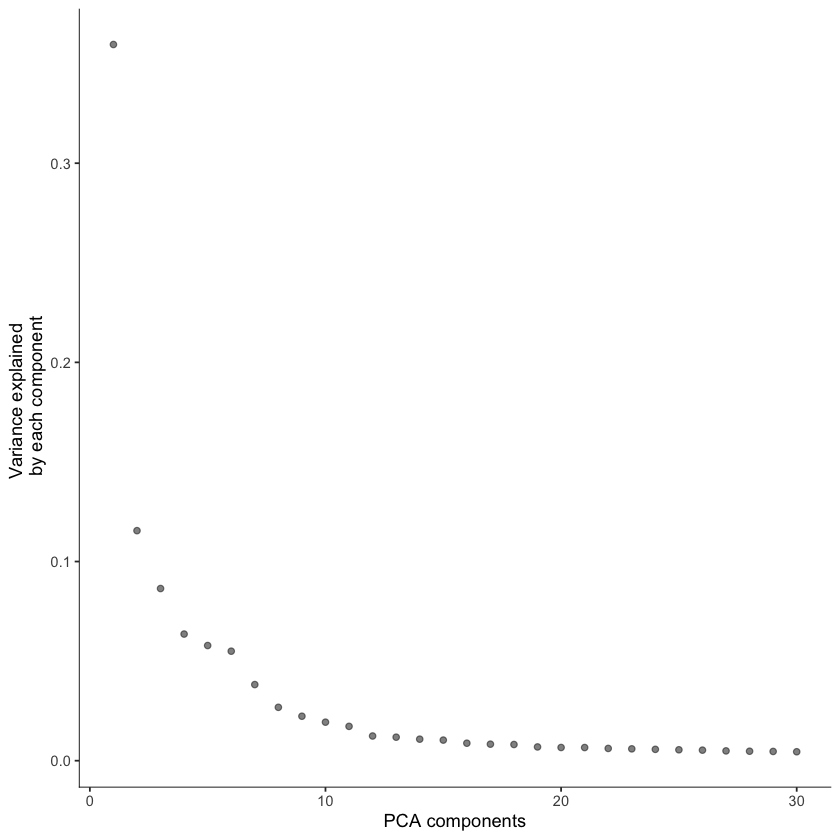

In [1034]:
cds_subset<-0
counts2<-0
cds<-0
counts<-0
sce<-0
#cds_uw<-cds_uw[genes,]
cds_uw = preprocess_cds(cds_uw, num_dim = 30,residual_model_formula_str="~PMI")
cds_uw = reduce_dimension(cds_uw)
cds_uw = cluster_cells(cds_uw)
plot_pc_variance_explained(cds_uw)

cds_uw$Diagnosis = cds_uw$Clinical.DX
cds_uw$Sex = cds_uw$Sex
cds_uw$Samples = cds_uw$ids

In [1035]:
cds_uw$Sex = Labels$Sex
head(cds_uw$Sex)

[1] "M" "M" "M" "M" "M" "M"

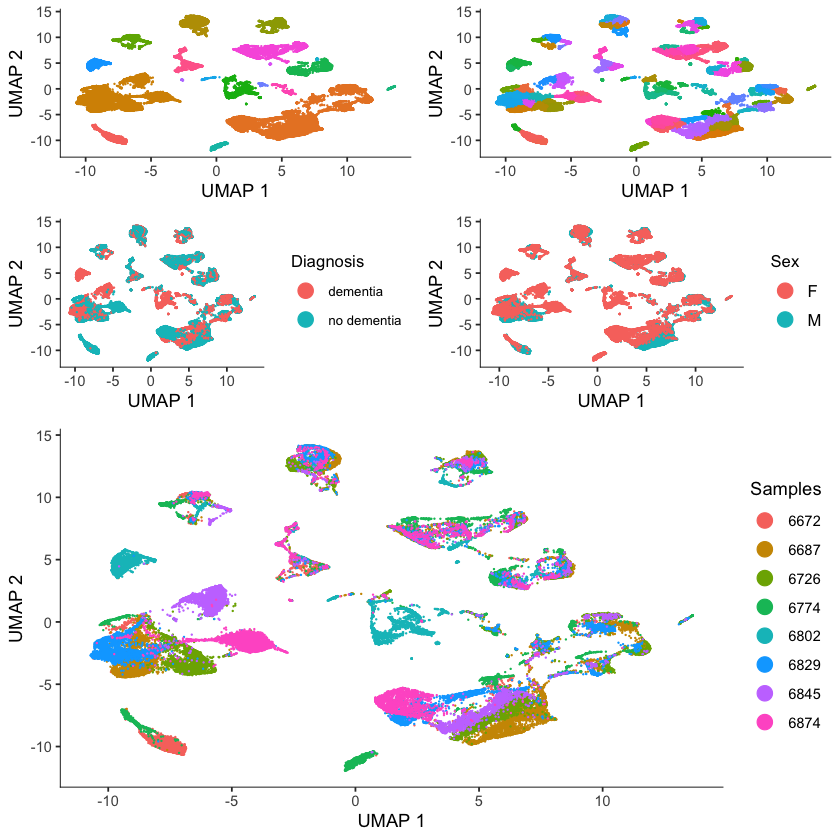

In [1036]:

p1<-plot_cells(cds_uw, color_cells_by="partition",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))+theme(legend.position = "none")
p2<-plot_cells(cds_uw, color_cells_by="Sex",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))
p3<-plot_cells(cds_uw, color_cells_by="Diagnosis",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 8))
p4<-plot_cells(cds_uw, color_cells_by="Samples",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)
p6<-plot_cells(cds_uw, color_cells_by="cluster",cell_size=.1,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 7),legend.key.size = unit(.5, "cm"),
  legend.key.width = unit(0.5,"cm") )+theme(legend.position = "none")
#pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/UW_sn_summary.pdf"))
grid.arrange(arrangeGrob(p1,p6, ncol=2),arrangeGrob(p3,p2,ncol=2),p4, heights=c(2,2,4), ncol=1)
#dev.off()

In [929]:
mathy_marker_genes <- read.csv('../data/mathys_marker_genes.csv')
names(mathy_marker_genes) <- as.matrix(mathy_marker_genes[1, ])
mathy_marker_genes <- mathy_marker_genes[-1, ]
mathy_marker_genes$adj.pvals = as.numeric(as.character(mathy_marker_genes$adj.pvals))
#mathy_marker_genes <- mathy_marker_genes[mathy_marker_genes$adj.pvals<1e-20,]
head(mathy_marker_genes)

genes<-c()
for (gene in unique(c(as.vector(mathy_marker_genes$gene.name),c("SYT1","SNAP25","GRIN1","GAD1","GAD2","SLC17A7","CAMK2A","NRGN","AQP4",
                              "GFAP","MBP","MOBP","PLP1","PDGFRA","VCAN","CD74","CSF1R","C3","FLT1","CLDN5")))){
    if (gene %in% rownames(cds_uw)){
        genes <- c(genes,which(rownames(cds_uw)==gene))
    }
}
length(genes)

,gene.name,adj.pvals,lFC,subpopulation,NA,NA,NA,NA,subpopulation,size (n)
,<fct>,<dbl>,<fct>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<fct>
2,DAB1,0,1.138272233,Ex0,NA,NA,NA,NA,Ast0,1728
3,ST6GALNAC5,0,0.68265007,Ex0,NA,NA,NA,NA,Ast1,1134
4,DPYD,0,0.604381037,Ex0,NA,NA,NA,NA,Ast2,369
5,RPS6KC1,0,0.639586954,Ex0,NA,NA,NA,NA,Ast3,161
6,CHRM3,0,0.530655173,Ex0,NA,NA,NA,NA,Ex0,7612
7,SMYD3,0,0.508785267,Ex0,NA,NA,NA,NA,Ex1,4383


[1] 4240

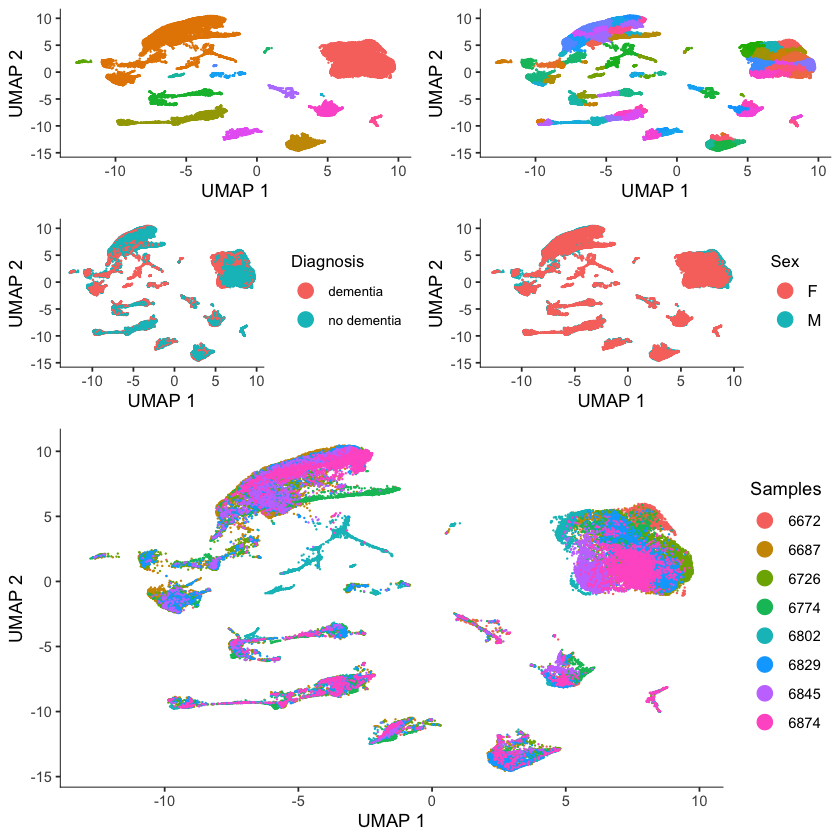

In [1037]:
cds_subset = cds_uw[genes,]
cds_subset = preprocess_cds(cds_subset, num_dim = 30,method="PCA",residual_model_formula_str="~PMI",norm_method="size_only")
cds_subset = reduce_dimension(cds_subset)
cds_subset = cluster_cells(cds_subset)

p1<-plot_cells(cds_subset, color_cells_by="partition",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))+theme(legend.position = "none")
p2<-plot_cells(cds_subset, color_cells_by="Sex",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))
p3<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 8))
p4<-plot_cells(cds_subset, color_cells_by="Samples",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)
p6<-plot_cells(cds_subset, color_cells_by="cluster",cell_size=.1,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 7),legend.key.size = unit(.5, "cm"),
  legend.key.width = unit(0.5,"cm") )+theme(legend.position = "none")
#pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/UW_sn_summary_marker_genes.pdf"))
grid.arrange(arrangeGrob(p1,p6, ncol=2),arrangeGrob(p3,p2,ncol=2),p4, heights=c(2,2,4), ncol=1)
#dev.off()

In [1080]:
saveRDS(cds_subset, file = "UW_monocle_preprocessed_cds.rds")

In [931]:
png(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/UW_sn_diffexp_markers.png"))
plot_cells(cds_subset, genes=c("SYT1","SNAP25","GRIN1","GAD1","GAD2","SLC17A7","CAMK2A","NRGN","AQP4",
                              "GFAP","MBP","MOBP","PLP1","PDGFRA","VCAN","CD74","CSF1R","C3","FLT1","CLDN5"),
           show_trajectory_graph=FALSE,
           label_cell_groups=FALSE,
           label_leaves=FALSE,reduction_method="UMAP",cell_size=.1)
dev.off()

pdf 
  2

No trajectory to plot. Has learn_graph() been called yet?


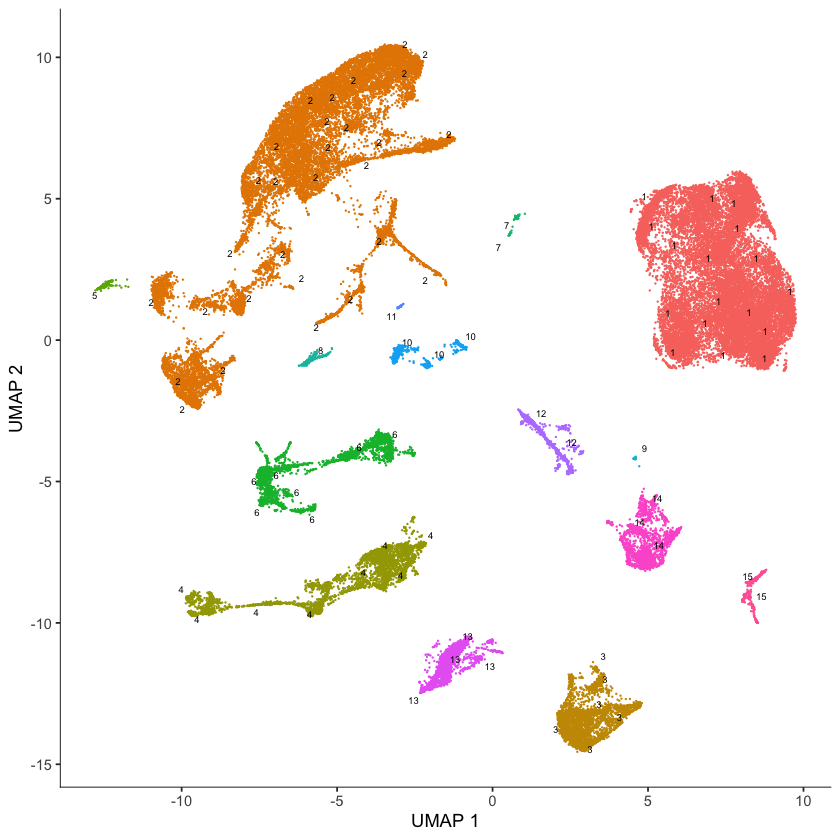

In [968]:
plot_cells(cds_subset, color_cells_by="partition",cell_size=.001,label_cell_groups=1)

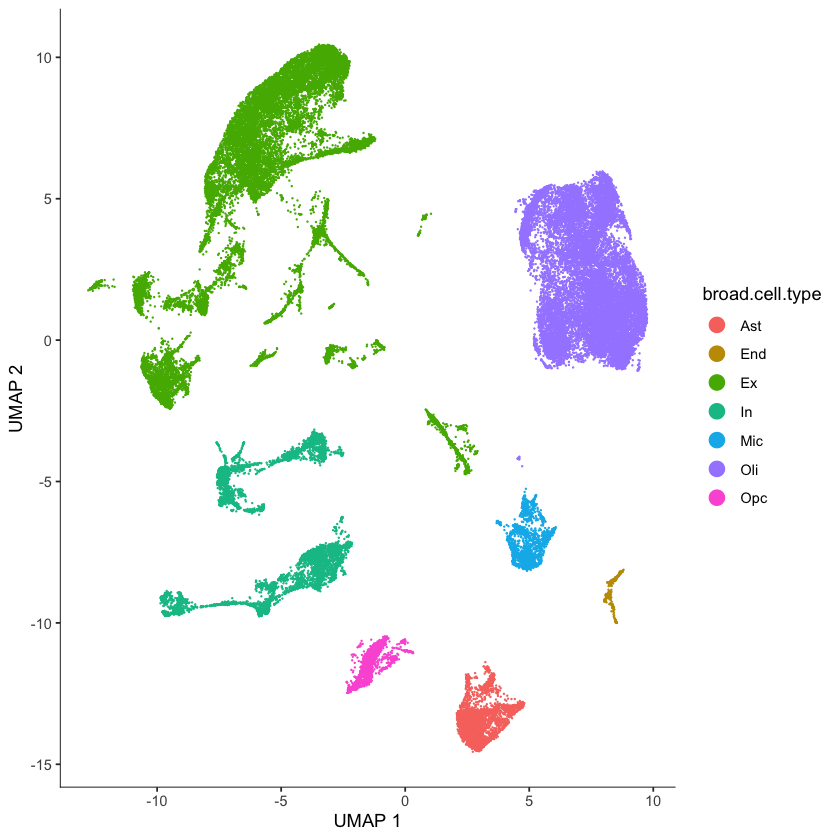

In [1039]:
cds_subset$broad.cell.type = cds_subset$Sex
for (partition in unique(partitions(cds_subset))){
    interneuron <- mean(counts(cds_subset)[rownames(cds_subset)=="GAD1",partitions(cds_subset)==partition])
    interneuron <- mean(c(interneuron,mean(counts(cds_subset)[rownames(cds_subset)=="GAD2",partitions(cds_subset)==partition])))
    Ex <- mean(counts(cds_subset)[rownames(cds_subset)=="CAMK2A",partitions(cds_subset)==partition])
    Ex <- mean(c(Ex,mean(counts(cds_subset)[rownames(cds_subset)=="NRGN",partitions(cds_subset)==partition])))
    Ast <- mean(counts(cds_subset)[rownames(cds_subset)=="AQP4",partitions(cds_subset)==partition])
    Ast <- mean(c(Ast,mean(counts(cds_subset)[rownames(cds_subset)=="GFAP",partitions(cds_subset)==partition])))/2
    Oli <- mean(counts(cds_subset)[rownames(cds_subset)=="MBP",partitions(cds_subset)==partition])
    Oli <- mean(c(Oli,mean(counts(cds_subset)[rownames(cds_subset)=="PLP1",partitions(cds_subset)==partition])))/3
    OPC <- mean(counts(cds_subset)[rownames(cds_subset)=="PDGFRA",partitions(cds_subset)==partition])
    OPC <- mean(c(OPC,mean(counts(cds_subset)[rownames(cds_subset)=="VCAN",partitions(cds_subset)==partition])))
    Mic <- mean(counts(cds_subset)[rownames(cds_subset)=="CD74",partitions(cds_subset)==partition])
    Mic <- mean(c(Mic,mean(counts(cds_subset)[rownames(cds_subset)=="CSF1R",partitions(cds_subset)==partition])))
    End <- mean(counts(cds_subset)[rownames(cds_subset)=="FLT1",partitions(cds_subset)==partition])
    End <- mean(c(End,mean(counts(cds_subset)[rownames(cds_subset)=="CLDN5",partitions(cds_subset)==partition])))
    names <- c('In','Ex','Ast','Oli','Opc','Mic','End')
    means <- c(interneuron, Ex, Ast, Oli, OPC, Mic, End)
    best_name <- names[which(means == max(means))]
    cds_subset$broad.cell.type[partitions(cds_subset)==partition] = best_name
}
plot_cells(cds_subset, color_cells_by="broad.cell.type",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)

In [1031]:
for (celltype in unique(cds_subset$broad.cell.type)){
    print(celltype)
    print(length(cds_subset$broad.cell.type[cds_subset$broad.cell.type==celltype])/length(colnames(cds_subset)))
}

# Ex	34976	0.497199556
# Ast	3392	0.048218804
# In	9196	0.130725272
# Mic	1920	0.027293663
# Oli	18235	0.259218719
# Opc	2627	0.037343985

[1] "Oli"
[1] 0.3478884
[1] "Ex"
[1] 0.398219
[1] "Mic"
[1] 0.02981491
[1] "In"
[1] 0.1316586
[1] "Opc"
[1] 0.04264392
[1] "Ast"
[1] 0.04977513


In [972]:
cds$broad.cell.type[cds$broad.cell.type=='Per'] ='End'
p1<-plot_cells(cds, color_cells_by="broad.cell.type",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+ggtitle('ROSMAP')+theme(axis.title=element_text(size=10))
p2<-plot_cells(cds_subset, color_cells_by="broad.cell.type",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+ggtitle('UW')+theme(axis.title=element_text(size=10))


celltype <- c(rep("Ex" , 2) , rep("Oli" , 2) ,rep("In",2),rep("Ast",2),rep("Opc",2),rep("Mic",2),rep("End",2) )
dataset <- rep(c("ROSMAP" , "UW") , 7)
Percent <- c(.50,.39,.26,.33,.13,.13,.05,.06,.04,.04,.03,.04,.01,.01)
data <- data.frame(celltype,dataset,Percent)
#Turn your 'treatment' column into a character vector
data$celltype <- as.character(data$celltype)
#Then turn it back into a factor with the levels in the correct order
data$celltype <- factor(data$celltype, levels=unique(data$celltype))
# Grouped
p3<-ggplot(data, aes(fill=dataset, y=Percent, x=celltype)) + 
    geom_bar(position="dodge", stat="identity")+ theme_classic()+theme(text=element_text(size=21))
pdf("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/celltypes_by_dataset_percentage.pdf") 
grid.arrange(arrangeGrob(p1,p2,ncol=2),p3,ncol=1,heights=c(.6,1))
dev.off()

pdf 
  2

In [1070]:
cds_subset$dementia = cds_subset$Diagnosis
cds_subset$Diagnosis = cds_subset$dementia
cds_subset$Diagnosis[cds_subset$ids==6672]='Control'
cds_subset$Diagnosis[cds_subset$ids!=6672]='AD'

rownames.counts2.,gene_short_name,status,term,estimate,std_err,test_val,p_value,normalized_effect,model_component,q_value
<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
APOE,APOE,OK,apoe,1.4916024,0.0145653,102.4077,0.00e+00,1.8493373,count,0.000000e+00
GFAP,GFAP,OK,apoe,0.8813194,0.0507156,17.3777,4.19e-67,1.2493145,count,1.776141e-63
DHFR,DHFR,OK,apoe,0.7494312,0.0485829,15.4258,2.37e-53,1.0680263,count,1.004406e-49
FAM107A,FAM107A,OK,apoe,0.9084523,0.0685717,13.2482,7.04e-40,1.2350748,count,2.982848e-36
CST3,CST3,OK,apoe,0.7817917,0.0590658,13.2360,8.28e-40,1.1076492,count,3.507408e-36
TMSB4X,TMSB4X,OK,apoe,0.4842586,0.0566923,8.5419,1.42e-17,0.6832482,count,6.013700e-14
MBP,MBP,OK,apoe,0.1229399,0.0154396,7.9627,1.78e-15,0.1773050,count,7.536520e-12
TUBB2B,TUBB2B,OK,apoe,0.7278171,0.1101247,6.6090,3.97e-11,1.0163981,count,1.680501e-07
EEF1A1,EEF1A1,OK,apoe,0.3701724,0.0620840,5.9624,2.53e-09,0.5010317,count,1.070696e-05


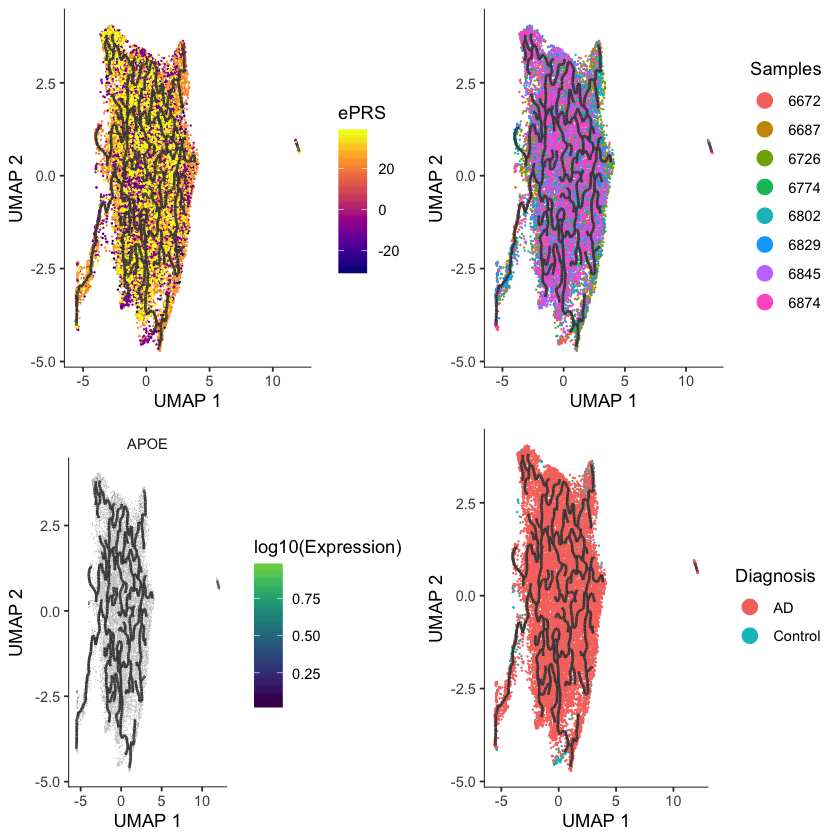

In [1075]:
# l = c("FTL","SPP1","RPLP1","TMEM163","SLC11A1","RPLP2","RPL28","RPS20","C1QC","FTH1","RPL19","RPS15","RPL35",
# "C1QB","RPL13","RPS19","RPS11","APOE","RPS27A","ACSL1","C1QA","RPL13A","PLEKHA7","RPS24","TMSB4X","RPL32","RPS2",
# "VSIG4","RPS6","RPS8","RPL31","RPL27A","RPS16","RPS3","RPL10","TPT1","CST3","TMSB10","HLA-DRA","CD74","CD14",
# "TXNRD1","CTSB","HLA-DRB1","ACTB","RPS9","GPX1","HIF1A","CYBA","AMBRA1","TYROBP","SLC2A5","LAPTM5","HLA-B","SIPA1L1",
# "MS4A6A","TBC1D14","DPYD","TUBA1B","HCLS1","PDE4B","SRGN","EEF1A1","HSP90AA1","SAT1","EPB41L3","ADGRG1","PSAP",
# "DENND3","RB1","GAPDH","PHC2","HSPA1A","RNF149","HCK","SH3TC1","NUMB")
# l = c(l,as.vector(mathy_marker_genes$gene.name[mathy_marker_genes$subpopulation=='Oli0']))
# l = c(l,as.vector(mathy_marker_genes$gene.name[mathy_marker_genes$subpopulation=='Oli1']))
# l = c(l,as.vector(mathy_marker_genes$gene.name[mathy_marker_genes$subpopulation=='Oli2']))
# l = c(l,as.vector(mathy_marker_genes$gene.name[mathy_marker_genes$subpopulation=='Oli3']))
# l = c(l,as.vector(mathy_marker_genes$gene.name[mathy_marker_genes$subpopulation=='Oli4']))
# l = c(l,as.vector(mathy_marker_genes$gene.name[mathy_marker_genes$subpopulation=='Oli5']))
# l = unique(l)
# length(l)
# inds = c()
# for (gene in l){
#     if ((gene %in% rownames(cds_subset))){
#     inds = c(inds,which(rownames(cds_subset)==gene))
#     }
# }
# cs <- cds_subset[,cds_subset$broad.cell.type=='Oli']
# cs = preprocess_cds(cs, num_dim = 20,residual_model_formula_str="~Samples")
# cs = reduce_dimension(cs)
# cs = cluster_cells(cs)
# cs <- learn_graph(cs,use_partition=T)
p1<-plot_cells(cs, color_cells_by="ePRS",cell_size=.001,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
p2<-plot_cells(cs, color_cells_by="Samples",cell_size=.001,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
p3<-plot_cells(cs, genes=c("APOE"),cell_size=.1,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
p4<-plot_cells(cs, color_cells_by="Diagnosis",cell_size=.001,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
grid.arrange(p1,p2,p3,p4,ncol=2)

# cs$apoe <- as.vector(counts(cs[rownames(cs)=='APOE',]))
# gene_fits = fit_models(cs, model_formula_str = "~apoe+PMI")
# fit_coefs = coefficient_table(gene_fits)
# fit_coefs <- subset(fit_coefs, q_value < 0.05)
# fit_coefs <- subset(fit_coefs, term != "(Intercept)")
# fit_coefs <- subset(fit_coefs, term != "Samples")
# fit_coefs <- subset(fit_coefs, term == "apoe")
fit_coefs<-fit_coefs[order(fit_coefs$q_value),]
head(fit_coefs,50)

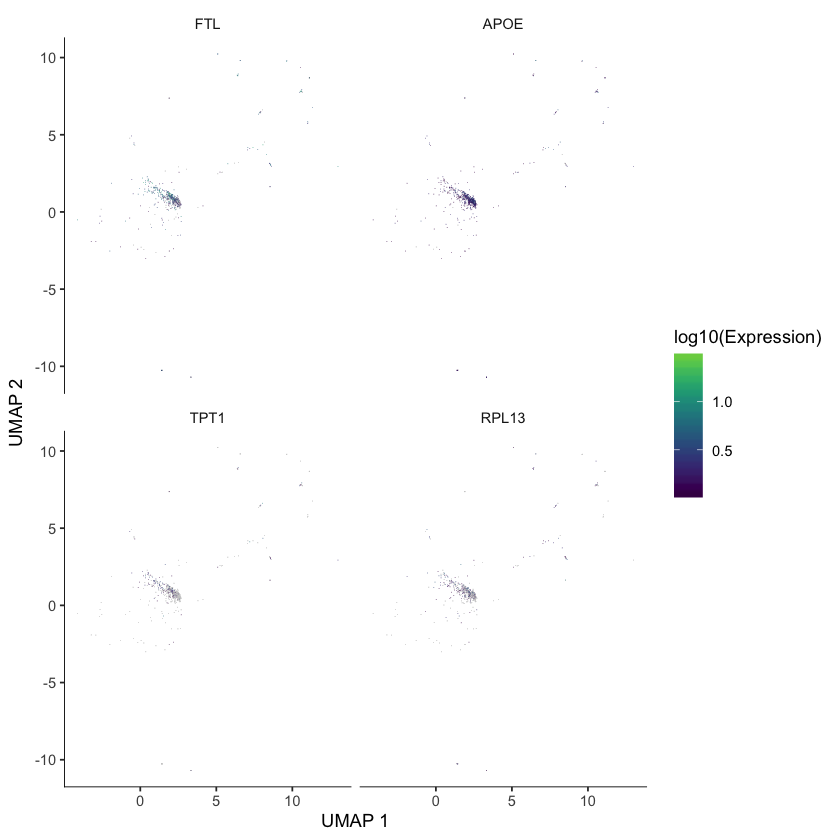

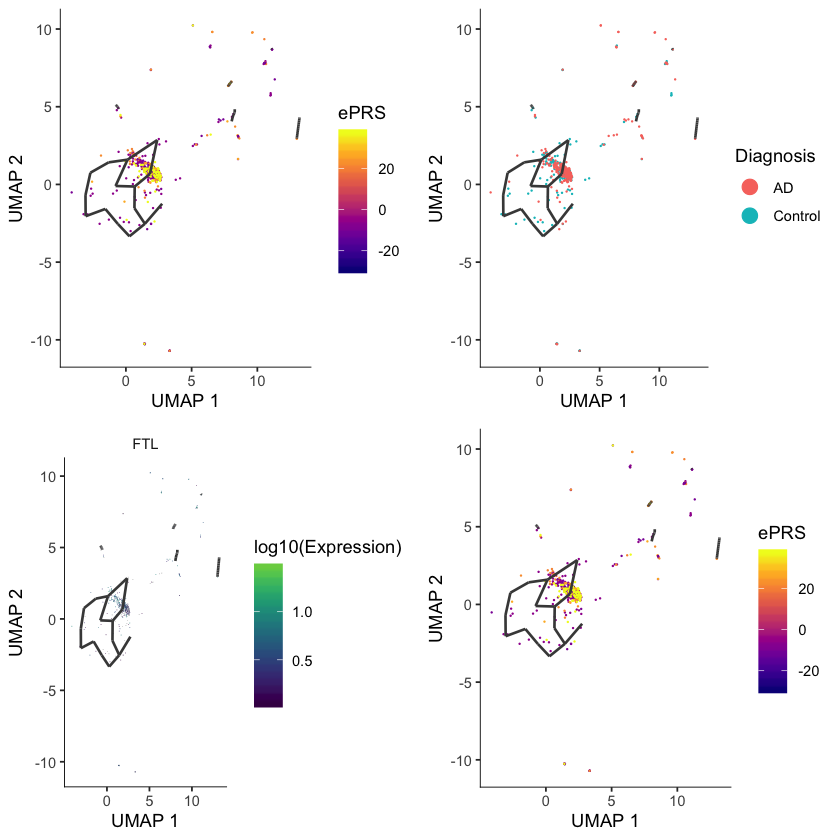

In [1073]:
cs<-cs[,cs$apoe>0]
plot_cells(cs, genes=c("FTL","APOE","TPT1","RPL13","SLC5A11","NLGN1"),cell_size=.1,label_cell_groups=0,show_trajectory_graph=FALSE)
p1<-plot_cells(cs, color_cells_by="ePRS",cell_size=.01,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
p2<-plot_cells(cs, color_cells_by="Diagnosis",cell_size=.01,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
p3<-plot_cells(cs, genes=c("FTL"),cell_size=.1,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
p4<-plot_cells(cs, color_cells_by="ePRS",cell_size=.01,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
grid.arrange(p1,p2,p3,p4,ncol=2)

[1] "Oli" "Ex"  "Ex"  "Oli" "Ex"  "Oli"